# Face detection, Image crop

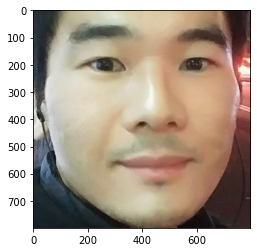

In [1]:
import face_recognition
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

image_path = os.getenv('HOME')+'/mini_projects/_E-07_face/celeb/이창호3.jpg'

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)    
    locations = face_recognition.face_locations(image)
    a, b, c, d = locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

plt.imshow(get_cropped_face(image_path))

In [2]:
dir_path = os.getenv('HOME')+'/mini_projects/_E-07_face/celeb'
file_list = os.listdir(dir_path)

print(len(file_list), '\n')

print(file_list)

199 

['이창호3.jpg', 'biden.jpg', '윤도현.png', '윤희석.jpeg', '인교진.jpeg', '오태경.jpeg', '정준하.jpg', '크리스 에반스.jpg', '조인성.jpg', '곽도원.jpg', '이종석.jpeg', '김재영.jpeg', '엄기준.jpeg', '류담.jpeg', '심지호.jpeg', '설정환.jpeg', '김승우.jpeg', '박신양.png', '제이크 질렌할.jpeg', '옥택연.jpeg', '공형진.jpeg', '김태훈.jpeg', '김민수.jpeg', '김성수.jpeg', '서장훈.jpg', '택연.jpg', '이은형.jpeg', '이주안.jpeg', '이명박.jpg', '김석훈.jpeg', '슬리피.jpg', '강봉성.png', '권화운.jpeg', 'RM.jpg', '강태오.jpeg', '윤박.jpeg', '세훈.jpg', '박휘순.jpg', '배성재.jpg', '첸.jpg', '윤균상.jpg', '안석환.jpeg', '성동일.jpeg', '윤태영.jpeg', '씨잼.jpg', '한석규.jpg', '손창민.jpeg', '온앤오프라운.jpg', '박진영.jpg', '온앤오프효진.jpg', 'b1a4진영.jpeg', '강동원.jpg', '레오나르도 디카프리오.jpeg', '윤다훈.jpeg', '공유.jpg', '김성균.jpeg', '김무열.jpeg', '김광규.jpeg', '지디.jpg', '남궁민.jpeg', '이정재.jpeg', '케빈 스페이시.jpeg', '안재홍.jpg', '김현중.jpeg', '오의식.jpeg', '서배준.png', '염동헌.jpeg', '김일우.jpeg', '박재범.jpg', '기성용.jpg', '이덕화.jpeg', '오지호.jpeg', '류태준.jpeg', '김권.jpeg', '송영규.jpeg', '유연석.jpeg', '노무현.jpeg', '돈스파이크.jpg', '이재백.jpeg', '기도훈.jpeg', '유민규.jpeg', '곽동연.jpeg', '강성민.jpeg', '이창훈.j

In [3]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

def get_face_embedding_dict(dir_path): 
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
                  
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

embedding_dict = get_face_embedding_dict(dir_path)

In [4]:
def get_distance(name1, name2): 
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

def get_nearest_face(name, top=10):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :  
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [5]:
get_nearest_face('이창호3')

순위 1 : 이름(이근대위), 거리(0.46118734613500817)
순위 2 : 이름(배성재), 거리(0.4829028138890374)
순위 3 : 이름(돈스파이크), 거리(0.48786452069697916)
순위 4 : 이름(김상경), 거리(0.49484685704925724)
순위 5 : 이름(조정치), 거리(0.49598408549965123)
순위 6 : 이름(강태오), 거리(0.5081376938101834)
순위 7 : 이름(이종석), 거리(0.5131267901990516)
순위 8 : 이름(여욱환), 거리(0.5186112384906316)
순위 9 : 이름(이상윤), 거리(0.519446718904896)
순위 10 : 이름(박휘순), 거리(0.5215246290412144)


# 프로젝트 진행 중 의문점   
   
   
**1 Face_recognition 라이브러리 말고 더 성능이 좋은 건 없을까? 찾아볼 것.**   
   
**2 face_recognition.face_locations() 함수가 어떻게 이미지에서 얼굴영역의 좌표를 찾아내는 거지?**   
   
**3 이 함수가 잘 이해되지 않는다**   
def get_cropped_face(image_file):   
    image = face_recognition.load_image_file(image_file)          
    locations = face_recognition.face_locations(image)   
    a, b, c, d = locations[0]   
    cropped_face = image[a:c,d:b,:]   
a, b, c, d는 뭘 받는 거지?   

**4. 얼굴검출에 실패했을 때 떴던 오류 메시지다.**   

IndexError                                Traceback (most recent call last)   
<ipython-input-11-b3bb00cea31a> in <module>   
     16     return embedding_dict   
     17    
---> 18 embedding_dict = get_face_embedding_dict(dir_path)   
   
    
<ipython-input-11-b3bb00cea31a> in get_face_embedding_dict(dir_path)   
      8     for file in file_list:   
      9         img_path = os.path.join(dir_path, file)   
---> 10         face = get_cropped_face(img_path)   
     11         embedding = get_face_embedding(face)   
     12         if len(embedding) > 0:   
   
    
<ipython-input-9-e9b93a34eba2> in get_cropped_face(image_file)   
     10     image = face_recognition.load_image_file(image_file)      
     11     locations = face_recognition.face_locations(image)      
---> 12     a, b, c, d = locations[0]      
     13     cropped_face = image[a:c,d:b,:]      
     14    
   
    
IndexError: list index out of range   
    
실패한 원인이 뭘까?   
   
    
흑백사진? 너무 멀어서? 얼굴 각도가 기울어서? 사진이 선명하지 않거나 밝기에 문제가 있어서?   
얼굴을 가리는 게 있어서?, 얼굴 크기가 다 달라서? 얼굴 위치가 달라서?   
   
**5. 시각화가 뭘 말하는 건지 잘 모르겠다**
차원축소를 해서 다른 사진들과 내 사진이 어느 거리만큼 떨어져 있는지 시각화하는 것인가?   



# 프로젝트 회고   
   
지금까지 했던 프로젝트 중에 가장 재미가 없었다..   
내가 별로 관심이 없는 주제여서인 것 같다.   
닮은 얼굴 찾는 건 궁금하지도 재밌지도 않다...   
나랑 전혀 안 닮았다고 생각한 사람들이 순위에 있어서는 결코 아니다.   
이렇게 써놓고 보니까 그것때문인 것처럼 읽히는데   
진짜로 아니다.   
뭔가... 안쓰느니만 못한게 되버린 느낌이다.   
   
아무튼   
풀잎머신러닝 강의 첫회 때 들었던 내용처럼   
단순한 distance metric을 써서 닮은꼴을 찾아내는 모델은   
정말 재미도 감동도 없는 수준인 것 같다.   
   
내 생각에 이번 프로젝트에서 내가 배웠어야 하는 건   
얼굴검출에 실패하는 이유와 그걸 해결하는 방법인것 같다.   
어떤 분은 예외처리를 해서 그냥 넘겼다고 하셨는데   
난 예외 처리도 할 줄 몰라서 일일이 사진을 한장씩 살펴보며   
왠지 검출이 잘 안될거 같은 사진을 골라내는 작업을 해야했다.   

그렇게 해보니 사진이 너무 작거나, 얼굴을 비스듬하게 혹은 옆으로 돌려서 찍은 사진들은   
검출이 안되는 게 확실해보였다.   
흑백 사진도 원인인것 같고...   
여기에 쓰인 얼굴검출 함수를 좀 더 알아봐야겠다.

